# Retail Revenue Prediction based on Multi Channels Consumer Sale

## 1) Executive Summary

### 1.1) Project Overview

In the retail industry, a key component for successful marketing team is to identify consumer behavior to enhance consumer Acquisition and retention, detecting people who are using multiple ways for buying products and based on behavior offering different channels may be based on age-group, gender preferences, demographic and many more factors effecting consumer preferences in this age of social media posts. 

This project is to identify effective consumer channels and payment methods to enhance revenue growth and prediction of a retail business revenue streams, offering multi sales channels to consumers for buying products form the retail, which includes, 
<br> - over e-commerce website, 
<br> - thru iOS mobile app, 
<br> - thru Android mobile app, 
<br> - from marketplace like Amazon.
 

### 1.2) Project Objective Question

The question this project aims to answer is what is the best model for predicting retail sales for revenue stream generated by channels. We will be looking at the dataset from the perspective of a retail marketing analyst who will be looking to answer the following questions:
<br> - Can revenue stream be predicted for retail based on prior channels performance?
<br> - What are the key features that drive the retail revenue predictions?

### 1.3) Findings

We will be training and tuning four models to accurately address the questions on behalf of marketing analyst. We will then evaluate and compare the four models' performances to identify the best one, then further scrutinize it to find the most effective features that enhance performance in this task. 


### 1.4) Results and Conclusion

We will draw insights from this model by conducting an analysis based on dataset, using libraries, identify the most important words/features used for making accurate predictions. We will also be locally analyzing this model and evaluating its class prediction process. Lastly, we will draw insights from our analyses and recommend areas to research and courses to undertake for future work in enhancing retail revenue stream, consumer preferences related to different channels and payment methods and regional effects.

## 2) Rationale

**Business Objective:** The marketing team wants to predict how much revenue will be generated by different channels, payment methods and regions. If the team can predict the revenue generated by features, they will be able to optimize their spending advertising budget on different channels and regions to maximize profit. 

By utilizing such analysis and predictive modeling, retail enterprises can focus on key revenue stream in form of channels, regions and plan their marketing campaigns and promotional activities for more customer acquisitions and retention. This would also help down the line to provide more accurate revenue guidance at enterprise level and mitigate multiple financial risks.

## 3) Understanding the Data

### 3.1) Data Source

This data is collected from Retail e-commerce enterprise by random sampling of transactions over different channels between CY'2021 to CY'2023.


More than 50K random samples from the data is used for model training to facilitate computation.

### 3.2) Data Problem Definition

We will be using this dataset to build a model that can predict the revenue generated by retail channels. We will also be looking at the features that drive the predictions of the model to provide insight to the marketing team.

### 3.3) Data Description & Basic Analysis

The dataset contains the following columns:

- **date**: The date of the record.
- **channel**: channel identifier.
- **network_payment_hash**: A hashed representation of the network payment.
- **region**: Geographical region.
- **days_after_registration**: Days passed since the user installed the app or register.
- **period**: Time period (in this case, it appears to be 'day' for all rows).
- **network_payment**: Name of the network payment method.
- **spend**: Amount spent.
- **cohort_size**: Size of the cohort.
- **organic_cohort_size**: Size of the organic cohort.
- **retained_users**: Number of users retained.
- **organic_retained_users**: Number of organic users retained.
- **revenue_ad**: Revenue from ads.
- **revenue_iap**: Revenue from in-app purchases.
- **revenue_sub**: Revenue from subscriptions.
- **organic_revenue_ad**: Organic revenue from ads.
- **organic_revenue_iap**: Organic revenue from in-app purchases.
- **organic_revenue_sub**: Organic revenue from subscriptions.

In [1]:
#Importing basic pandas and sklearn libs

import math
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
#Reading Reatil Dataset frrom csv

data = pd.read_csv('data/RetailDataset.csv')
data.sample(5)

,date,channel,network_payment_hash,region,days_after_registration,period,network_payment,spend,cohort_size,organic_cohort_size,retained_users,organic_retained_users,revenue_ad,revenue_iap,revenue_sub,organic_revenue_ad,organic_revenue_iap,organic_revenue_sub
34740,5/9/23,Android App,561774341,APAC,90,day,PayPal,0.0,2,1.708333,0,0.000000,0.0000,0.0,0.0,0.000000,0.0,0.0
29619,4/25/22,Android App,1244348022,LatAM,55,day,CreditCard,0.0,1445,197.485686,17,2.807373,2.9131,0.0,0.0,0.153417,0.0,0.0
31637,3/21/22,Marketplace,561774341,NorthAm,70,day,PayPal,0.0,39,82.587265,0,3.696098,0.0000,0.0,0.0,0.380000,0.0,0.0
5299,9/20/21,Marketplace,1244348022,China,89,day,CreditCard,0.0,0,53.526670,0,1.538910,0.0000,0.0,0.0,0.052472,0.0,0.0
36923,12/23/22,Marketplace,561774341,LatAM,45,day,PayPal,0.0,0,22.824270,0,1.156898,0.0000,0.0,0.0,0.063095,0.0,0.0


In [3]:
#Getting basic dataset info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51405 entries, 0 to 51404
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     51405 non-null  object 
 1   channel                  51405 non-null  object 
 2   network_payment_hash     51405 non-null  int64  
 3   region                   51405 non-null  object 
 4   days_after_registration  51405 non-null  int64  
 5   period                   51405 non-null  object 
 6   network_payment          51405 non-null  object 
 7   spend                    51405 non-null  float64
 8   cohort_size              51405 non-null  int64  
 9   organic_cohort_size      51405 non-null  float64
 10  retained_users           51405 non-null  int64  
 11  organic_retained_users   51405 non-null  float64
 12  revenue_ad               51405 non-null  float64
 13  revenue_iap              51405 non-null  float64
 14  revenue_sub           

In [4]:
#Looking head rows

data.head()

,date,channel,network_payment_hash,region,days_after_registration,period,network_payment,spend,cohort_size,organic_cohort_size,retained_users,organic_retained_users,revenue_ad,revenue_iap,revenue_sub,organic_revenue_ad,organic_revenue_iap,organic_revenue_sub
0,8/12/21,iOS App,81880948,LatAM,82,day,MobilePay,237.275169,226,306.573488,1,3.534988,0.0251,0.0,0.0,0.112073,0.000000,0.0
1,4/16/23,Android App,81880948,NorthAm,27,day,MobilePay,0.000000,250,56.848112,6,1.536435,5.7208,0.0,0.0,0.251103,0.273815,0.0
2,2/20/21,Marketplace,81880948,EMEA,93,day,MobilePay,0.000000,84,18.809504,4,0.750178,0.0100,0.0,0.0,0.007861,0.000000,0.0
3,9/6/22,iOS App,81880948,LatAM,50,day,MobilePay,52.953013,41,68.579913,1,1.068800,0.0501,0.0,0.0,0.074565,0.000000,0.0
4,1/17/23,Android App,81880948,NorthAm,17,day,MobilePay,905.814500,730,120.056114,41,4.621583,3.7005,0.0,0.0,1.304274,0.000000,0.0


In [5]:
#Looking tail rows

data.tail()

,date,channel,network_payment_hash,region,days_after_registration,period,network_payment,spend,cohort_size,organic_cohort_size,retained_users,organic_retained_users,revenue_ad,revenue_iap,revenue_sub,organic_revenue_ad,organic_revenue_iap,organic_revenue_sub
51400,3/20/21,Marketplace,561774341,EMEA,41,day,PayPal,116.582310,274,351.831489,2,2.348252,0.0100,0.0,0.0,0.049563,0.000000,0.0
51401,6/15/22,Android App,561774341,LatAM,107,day,PayPal,3142.572062,3389,479.964496,17,2.874809,0.6153,0.0,0.0,0.125241,0.000000,0.0
51402,5/30/21,Website,561774341,NorthAm,109,day,PayPal,7413.817534,3096,788.946018,39,27.592672,5.7085,0.0,0.0,6.295370,25.543660,0.0
51403,1/30/23,Android App,561774341,APAC,0,day,PayPal,0.160000,9,5.428572,9,5.428572,0.5527,0.0,0.0,0.508386,0.000000,0.0
51404,9/4/22,iOS App,561774341,NorthAm,119,day,PayPal,3171.270000,1304,1805.761845,8,18.105654,1.5754,0.0,0.0,1.759685,1.104814,0.0


### 3.4) Exploratory Data Analysis

In [6]:
#Getting statistics of the dataset

data.describe(include='all')

,date,channel,network_payment_hash,region,days_after_registration,period,network_payment,spend,cohort_size,organic_cohort_size,retained_users,organic_retained_users,revenue_ad,revenue_iap,revenue_sub,organic_revenue_ad,organic_revenue_iap,organic_revenue_sub
count,51405,51405,5.140500e+04,51405,51405.000000,51405,51405,51405.000000,51405.000000,51405.000000,51405.000000,51405.000000,51405.000000,51405.000000,51405.000000,51405.000000,51405.000000,51405.000000
unique,947,4,NaN,5,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,9/24/22,iOS App,NaN,NorthAm,NaN,day,PayPal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,87,13040,NaN,10422,NaN,47374,17294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,6.288966e+08,NaN,67.485225,NaN,NaN,656.475111,757.279584,279.280557,30.496333,13.994421,8.523013,2.533183,0.356349,3.583773,1.525728,0.121277
std,NaN,NaN,4.758837e+08,NaN,55.016218,NaN,NaN,2137.080091,2368.111730,628.945684,285.023445,89.025590,121.754191,30.073635,4.363706,47.777589,15.211318,1.764583
min,NaN,NaN,8.188095e+07,NaN,0.000000,NaN,NaN,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,8.188095e+07,NaN,30.000000,NaN,NaN,0.000000,0.000000,5.875000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000964,0.000000,0.000000
50%,NaN,NaN,5.617743e+08,NaN,60.000000,NaN,NaN,0.000000,47.000000,53.835555,1.000000,1.338605,0.000000,0.000000,0.000000,0.046275,0.000000,0.000000
75%,NaN,NaN,1.244348e+09,NaN,93.000000,NaN,NaN,212.598417,508.000000,267.887305,11.000000,8.561416,0.994600,0.000000,0.000000,0.660534,0.000000,0.000000


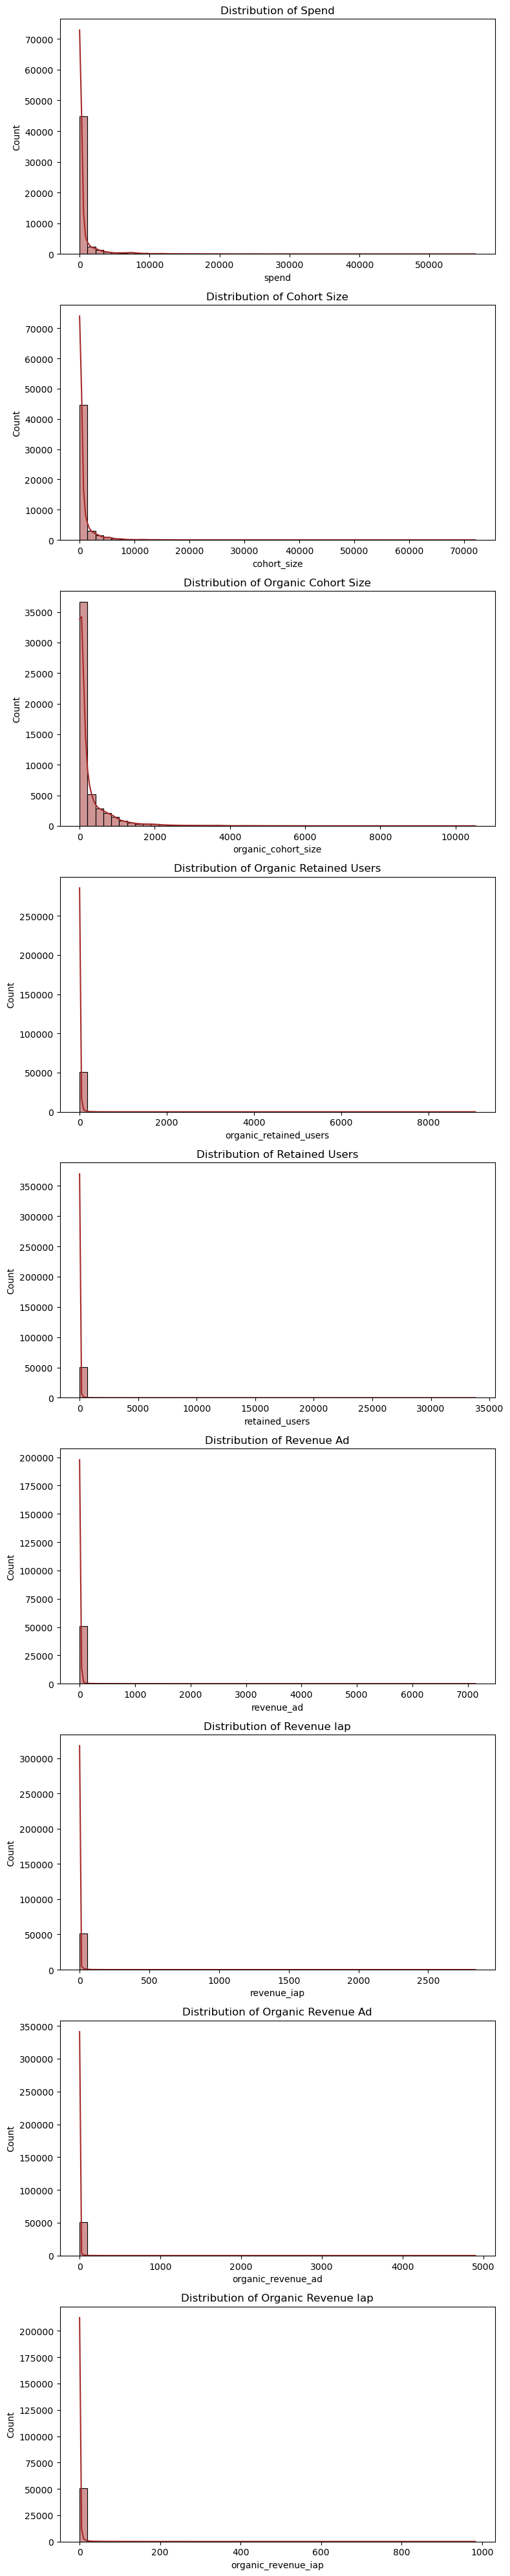

In [7]:
# To get a clearer visual understanding, plotting histograms for each of these columns.

import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
#sns.set_style('whitegrid')

# Columns to analyze
columns = ['spend', 'cohort_size', 'organic_cohort_size', 'organic_retained_users', 'retained_users', 'revenue_ad', 'revenue_iap', 'organic_revenue_ad', 'organic_revenue_iap']

# Titles for the plots
titles = []

for col in columns:
        titles.append('Distribution of ' + col.replace('_', ' ').title())


# Plotting histograms with log scale transformation
fig, axes = plt.subplots(9, 1, figsize=(8, 40))

for ax, col, title in zip(axes.ravel(), columns, titles):
    sns.histplot(data[col], bins=50, ax=ax, kde=True, color='brown', log_scale=False)
    ax.set_title(title)
    ax.set_ylabel('Count')
    
plt.tight_layout()
plt.show()
    

**Observation:** From the above statistics and plots, we see that:
<br>- Many columns have a mean that's much higher than the median. This suggests that the data is skewed, with a few large values pulling the mean up.
<br>- Many metrics have a median of zero, indicating that for at least half of the records, there was no spend, revenue, or user retention.
<br> - The majority of records have a spend close to zero, and there's a long tail with a few records having significantly higher spends.
<br> - Most records have a smaller cohort size, but there are outliers with larger sizes.
<br> - A similar pattern to the cohort size, with the majority of records having smaller organic cohort sizes.
<br> - The majority of records have a low number of retained users, with a few having a significantly higher count.
<br> - Most records have revenue close to $0, with a long tail representing a few records with higher revenues.
<br> - A similar pattern to the revenue from ads.
<br> - Most records have no subscription revenue, with a few exceptions.

### 3.5) Preprocessing

Preprocessing dataset to make it ready for modeling, this includes some cleanups or adding few additional columns transforming data into the required form.

**3.5 (a) Preprocessing transformation**

In [8]:
# Creating a 'total_revenue' column
data['total_revenue'] = data['revenue_ad'] + data['revenue_iap'] + data['revenue_sub']

# Creating the 'total_organic_revenue' column
data['total_organic_revenue'] = data['organic_revenue_ad'] + data['organic_revenue_iap'] + data['organic_revenue_sub']

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51405 entries, 0 to 51404
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     51405 non-null  object 
 1   channel                  51405 non-null  object 
 2   network_payment_hash     51405 non-null  int64  
 3   region                   51405 non-null  object 
 4   days_after_registration  51405 non-null  int64  
 5   period                   51405 non-null  object 
 6   network_payment          51405 non-null  object 
 7   spend                    51405 non-null  float64
 8   cohort_size              51405 non-null  int64  
 9   organic_cohort_size      51405 non-null  float64
 10  retained_users           51405 non-null  int64  
 11  organic_retained_users   51405 non-null  float64
 12  revenue_ad               51405 non-null  float64
 13  revenue_iap              51405 non-null  float64
 14  revenue_sub           

**Observation:** Now info is showing total 20 columns. Dataset has two additional columns 'total_revenue' and 'total_organic_revenue' 

**3.5 (b) Multivariate plots**

Plotting multivariate plots to get more insights into the coreralation before final dataset preparation

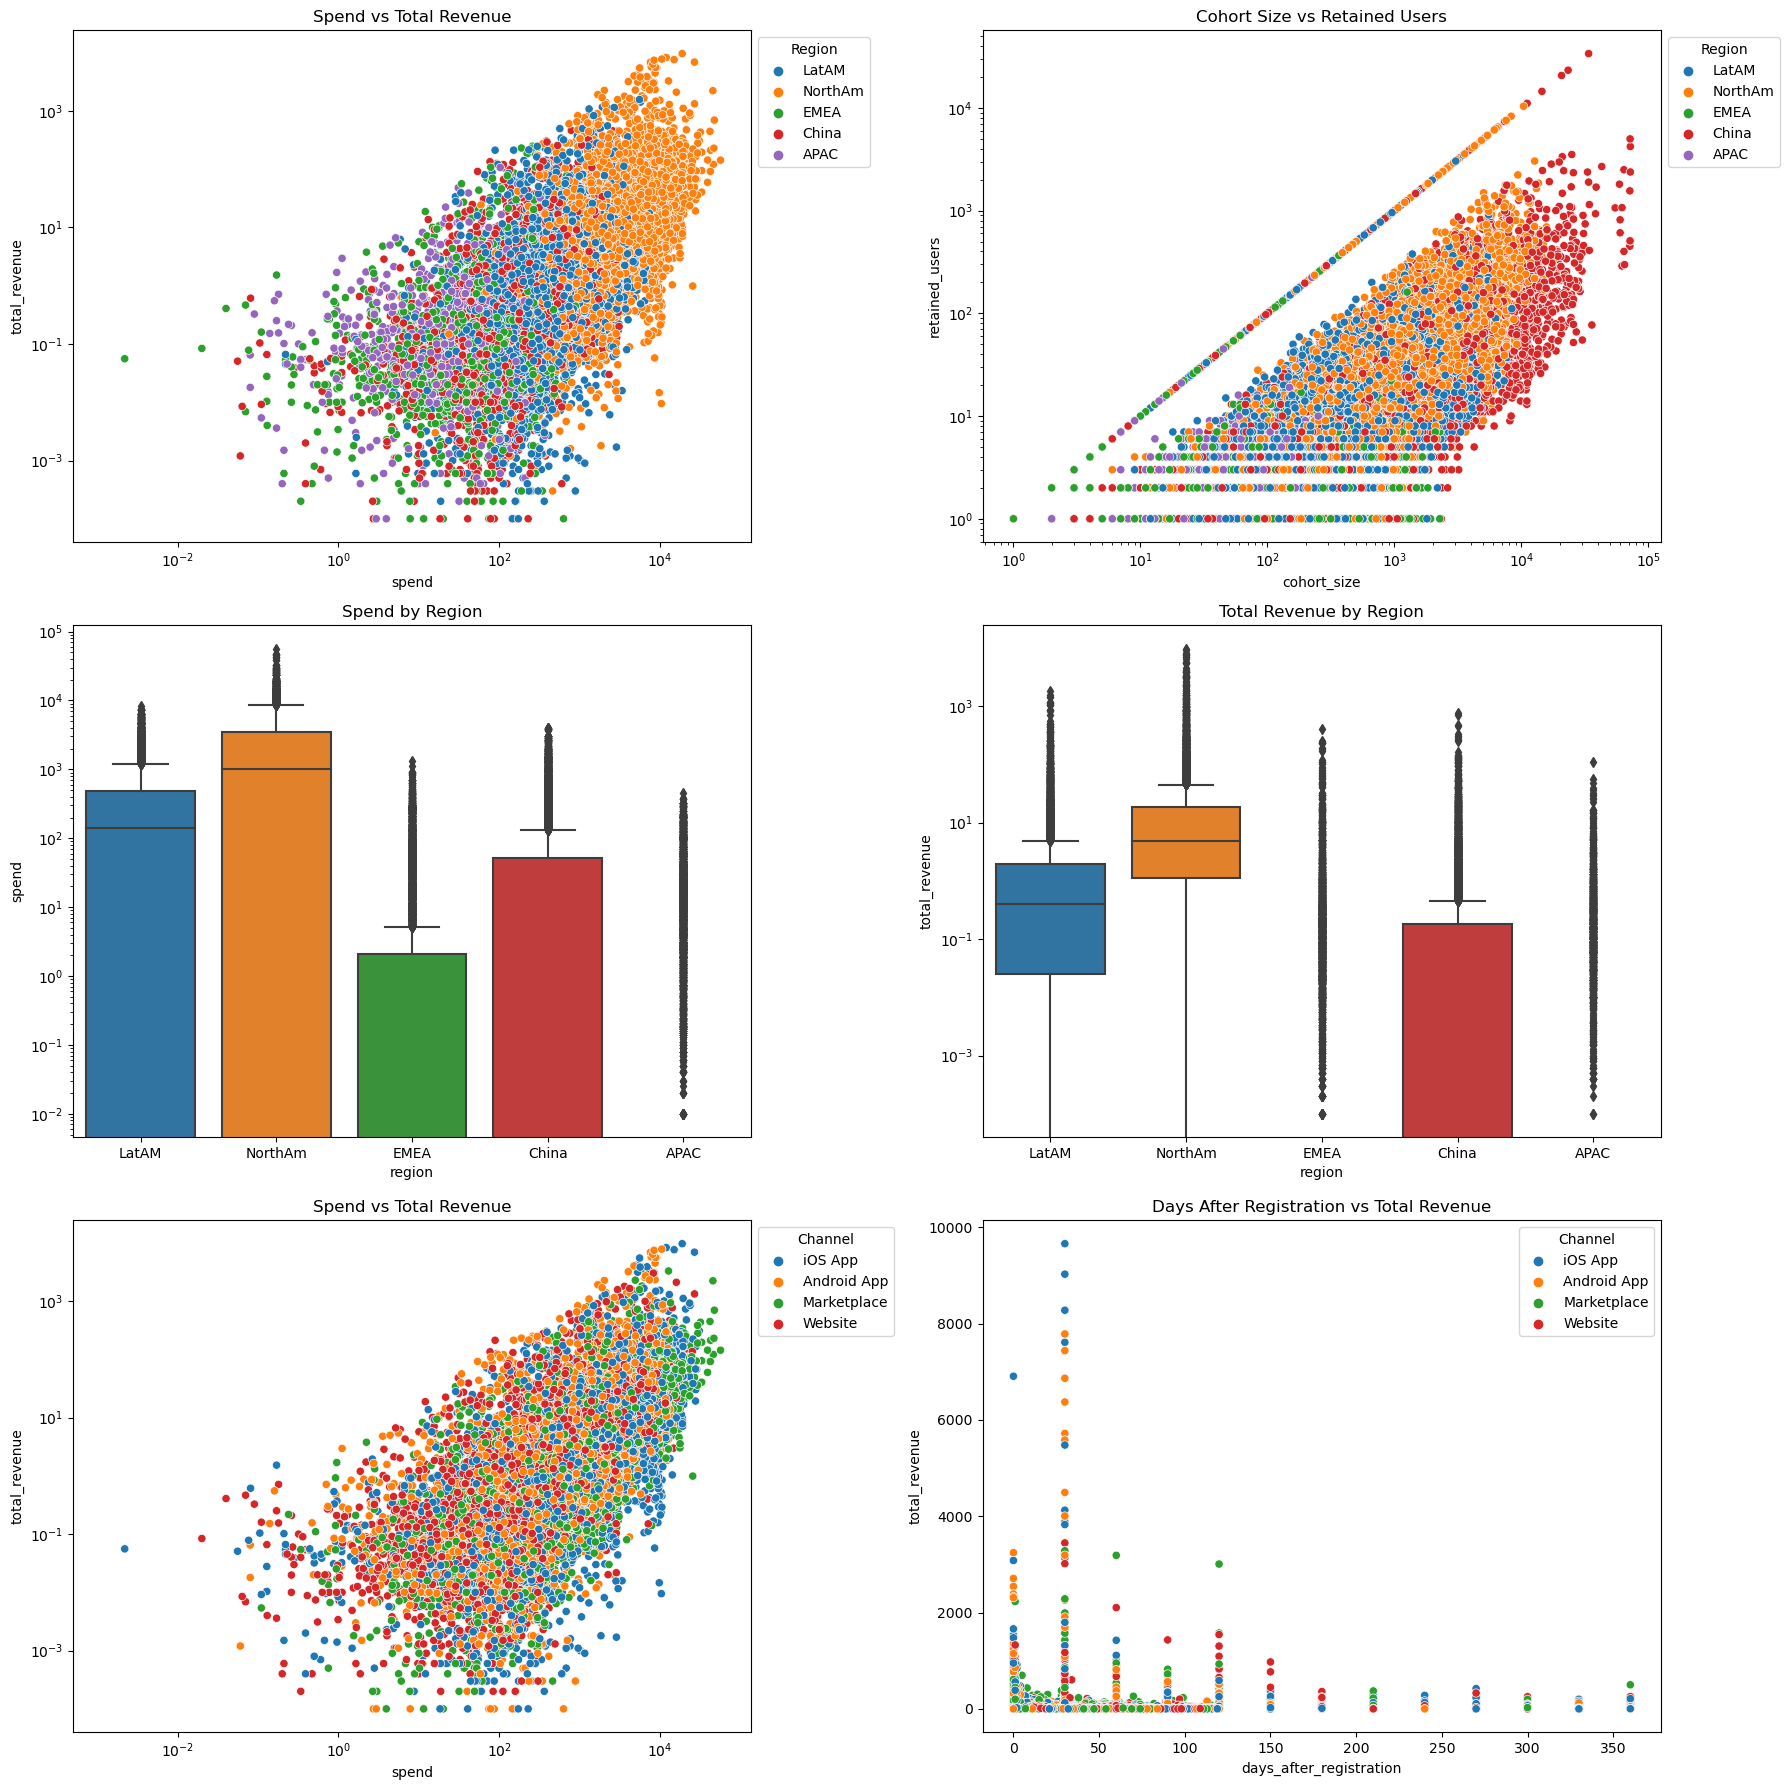

In [9]:
# plots

fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# 1. Scatter plot for spend vs total revenue
sns.scatterplot(data=data, x='spend', y='total_revenue', hue='region', ax=axes[0, 0])
axes[0, 0].set_title('Spend vs Total Revenue')
axes[0, 0].set_xscale('log')
axes[0, 0].set_yscale('log')
axes[0, 0].legend(title='Region', bbox_to_anchor=(1, 1))

# 2. Scatter plot for cohort size vs retained users
sns.scatterplot(data=data, x='cohort_size', y='retained_users', hue='region', ax=axes[0, 1])
axes[0, 1].set_title('Cohort Size vs Retained Users')
axes[0, 1].set_xscale('log')
axes[0, 1].set_yscale('log')
axes[0, 1].legend(title='Region', bbox_to_anchor=(1, 1))

# 3. Box plot for spend by region
sns.boxplot(data=data, x='region', y='spend', ax=axes[1, 0])
axes[1, 0].set_title('Spend by Region')
axes[1, 0].set_yscale('log')

# 4. Box plot for total revenue by region
sns.boxplot(data=data, x='region', y='total_revenue', ax=axes[1, 1])
axes[1, 1].set_title('Total Revenue by Region')
axes[1, 1].set_yscale('log')

# 5. Scatter plot for spend vs total revenue
sns.scatterplot(data=data, x='spend', y='total_revenue', hue='channel', ax=axes[2, 0])
axes[2, 0].set_title('Spend vs Total Revenue')
axes[2, 0].set_xscale('log')
axes[2, 0].set_yscale('log')
axes[2, 0].legend(title='Channel', bbox_to_anchor=(1, 1))

# 6. Scatter plot for spend vs total revenue
sns.scatterplot(data=data, x='days_after_registration', y='total_revenue', hue='channel', ax=axes[2, 1])
axes[2, 1].set_title('Days After Registration vs Total Revenue')
axes[2, 1].legend(title='Channel', bbox_to_anchor=(1, 1))


plt.tight_layout()
plt.show()
    

**Observations:**

- **Spend vs Total Revenue (by Region)**: There tends to be more spend (and revenue) on NorthAm,LatAm regions vs other regions.
- **Cohort Size vs Retained Users**: There are some interesting patterns here than need further investigation.
- **Spend by region** China is top3 in spend, APAC doesn't get much spend - that's interesting.
- **Total Revenue by Region**: NorthAm and LatAm at the top of the list - makes sense.
- **Spend vs Total Revenue (by channel)**: No clear pattern here, needs more investigation.
- **Days After Registration vs Total Revenue**: revenue drops over time.

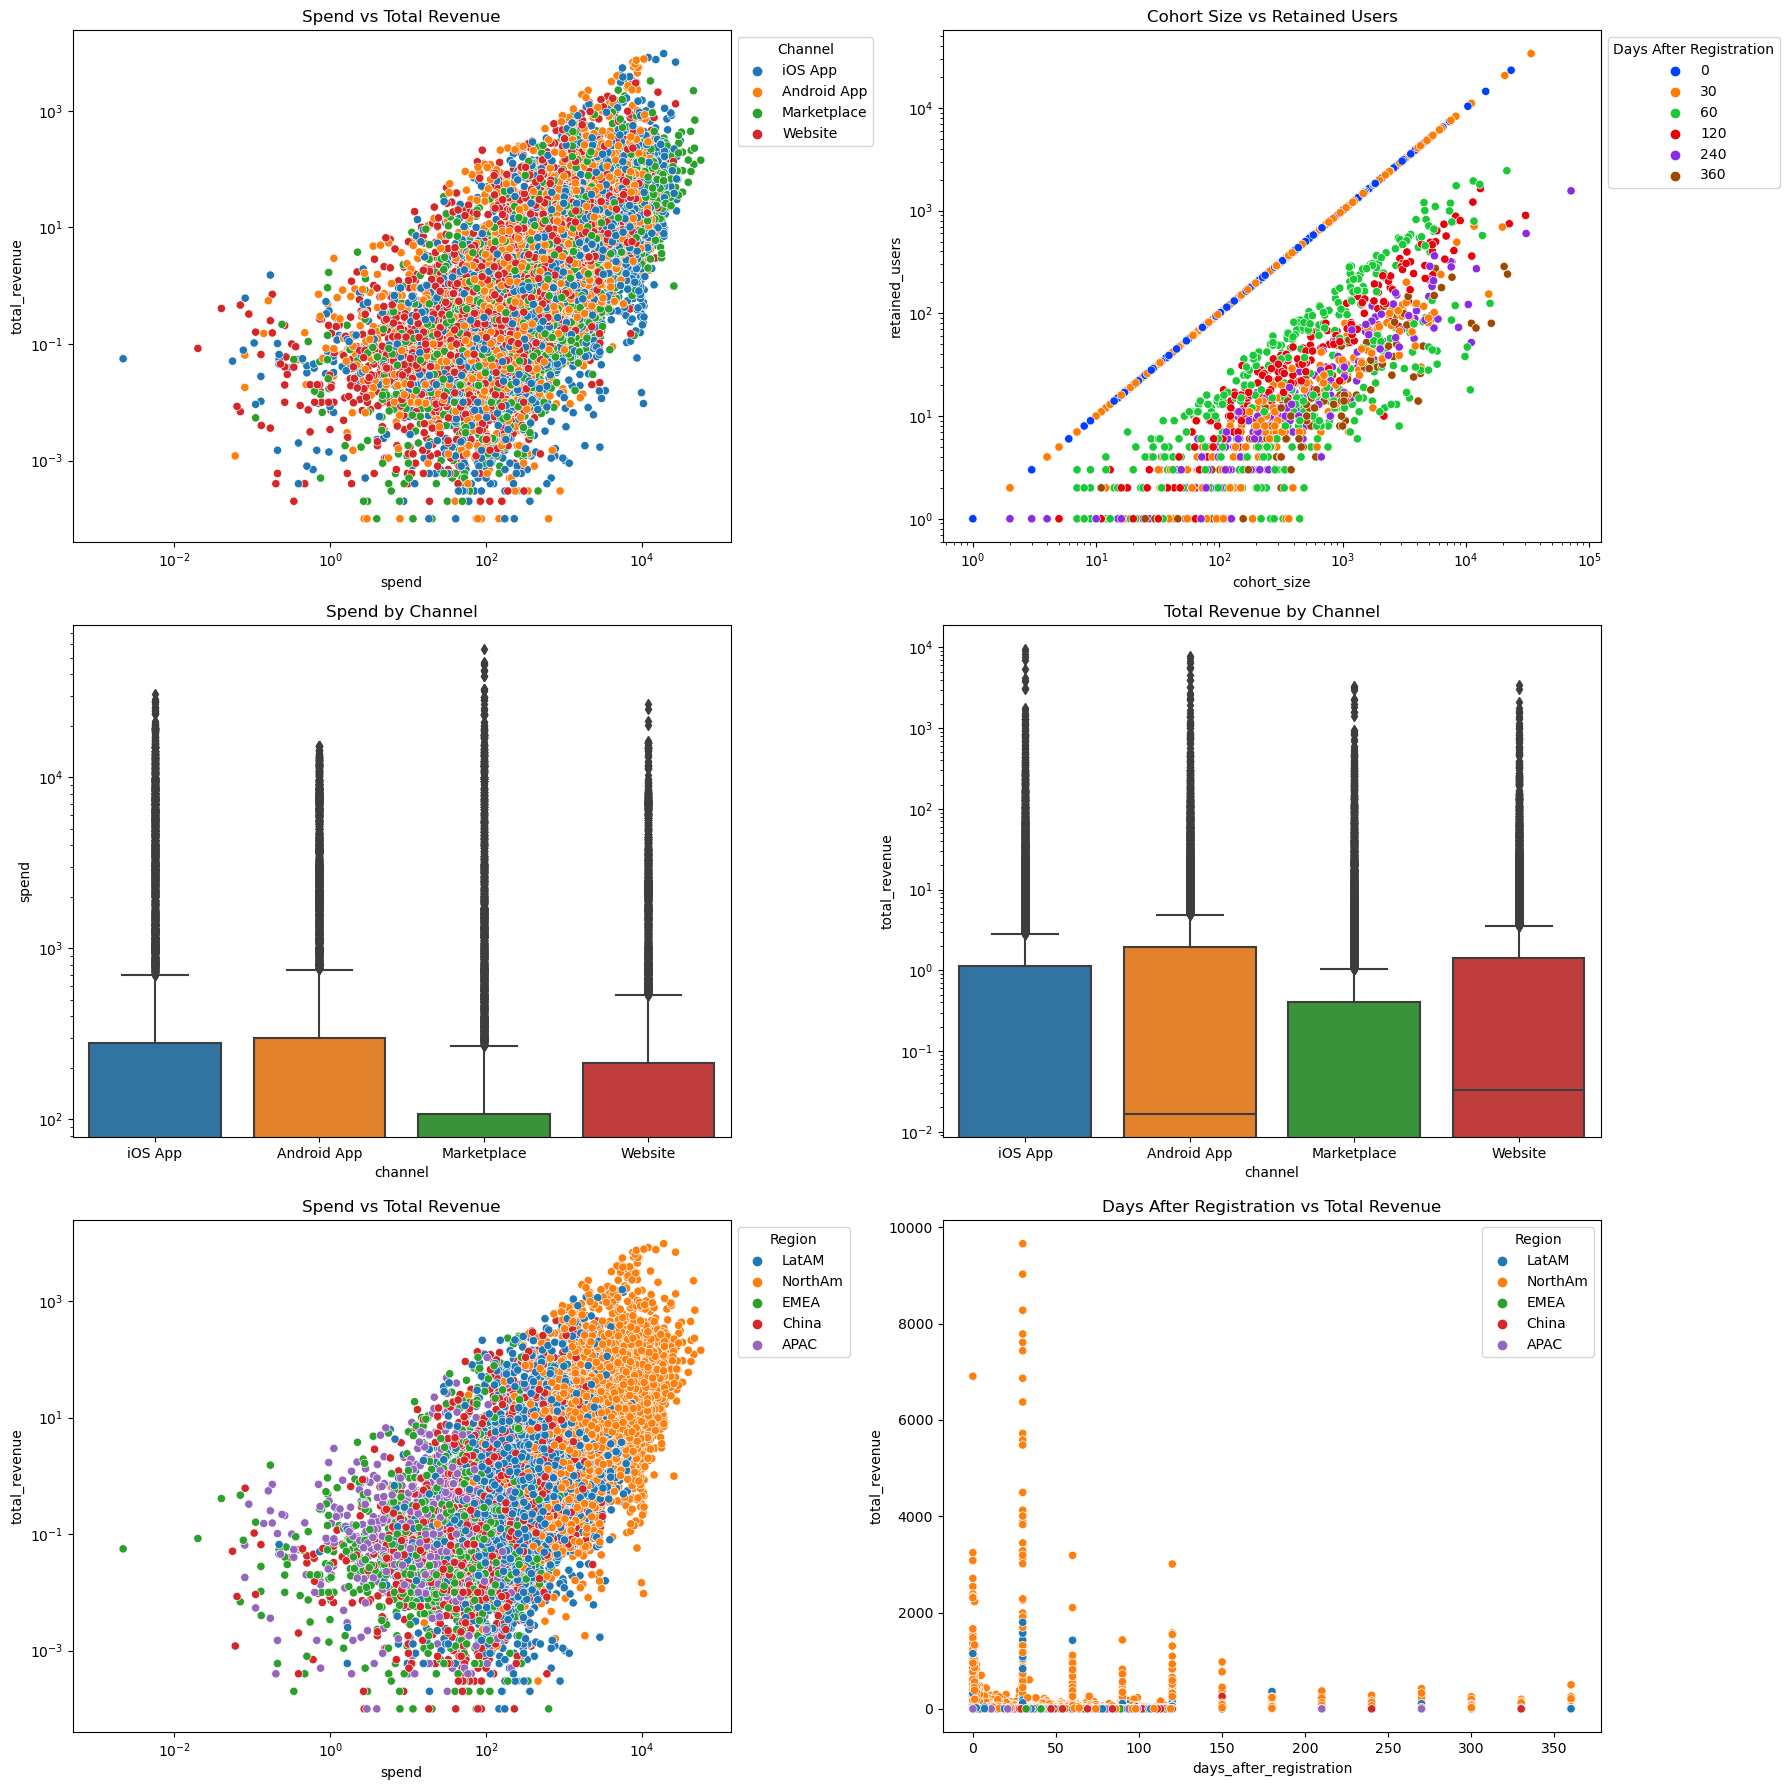

In [10]:
#Plots continue

# Multivariate plots
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# 1. Scatter plot for spend vs total revenue
sns.scatterplot(data=data, x='spend', y='total_revenue', hue='channel', ax=axes[0, 0])
axes[0, 0].set_title('Spend vs Total Revenue')
axes[0, 0].set_xscale('log')
axes[0, 0].set_yscale('log')
axes[0, 0].legend(title='Channel', bbox_to_anchor=(1, 1))

# 2. Scatter plot for cohort size vs retained users
palette_choice = sns.color_palette("bright")[0:6]
sns.scatterplot(data=data[data['days_after_registration'].isin([0, 30, 60, 120, 240, 360])], x='cohort_size', y='retained_users', hue='days_after_registration', ax=axes[0, 1], palette=palette_choice)
axes[0, 1].set_title('Cohort Size vs Retained Users')
axes[0, 1].set_xscale('log')
axes[0, 1].set_yscale('log')
axes[0, 1].legend(title='Days After Registration', bbox_to_anchor=(1, 1))

# 3. Box plot for spend by region
sns.boxplot(data=data, x='channel', y='spend', ax=axes[1, 0])
axes[1, 0].set_title('Spend by Channel')
axes[1, 0].set_yscale('log')

# 4. Box plot for total revenue by region
sns.boxplot(data=data, x='channel', y='total_revenue', ax=axes[1, 1])
axes[1, 1].set_title('Total Revenue by Channel')
axes[1, 1].set_yscale('log')

# 5. Scatter plot for spend vs total revenue
sns.scatterplot(data=data, x='spend', y='total_revenue', hue='region', ax=axes[2, 0])
axes[2, 0].set_title('Spend vs Total Revenue')
axes[2, 0].set_xscale('log')
axes[2, 0].set_yscale('log')
axes[2, 0].legend(title='Region', bbox_to_anchor=(1, 1))

# 6. Scatter plot for spend vs total revenue
sns.scatterplot(data=data, x='days_after_registration', y='total_revenue', hue='region', ax=axes[2, 1])
axes[2, 1].set_title('Days After Registration vs Total Revenue')
axes[2, 1].legend(title='Region', bbox_to_anchor=(1, 1))


plt.tight_layout()
plt.show()
    

**Observations:**

- **Spend vs Total Revenue (by Channel)**: I don't see very clear pattern here.
- **Cohort Size vs Retained Users (by days after registration)**: The days_after_registration dimension needs some work to actually be useful.
- **Spend by Channel** Aside from "Marketplace" the rest of the apps get very similar spend budgets.
- **Total Revenue by Channel**: "Marketplace" gives pretty good returns since the gap in revenue closed significantly (vs spend).
- **Spend vs Total Revenue (by region)**: We can see the same region specific trends.
- **Days After Registration vs Total Revenue**: The NorthAm region clearly outperforms the other ones.

**3.5 (c) Group Based Analysis**

Grouping data by 'cahnnel wise' and 'network_payment' for calculating the mean for selected metrics

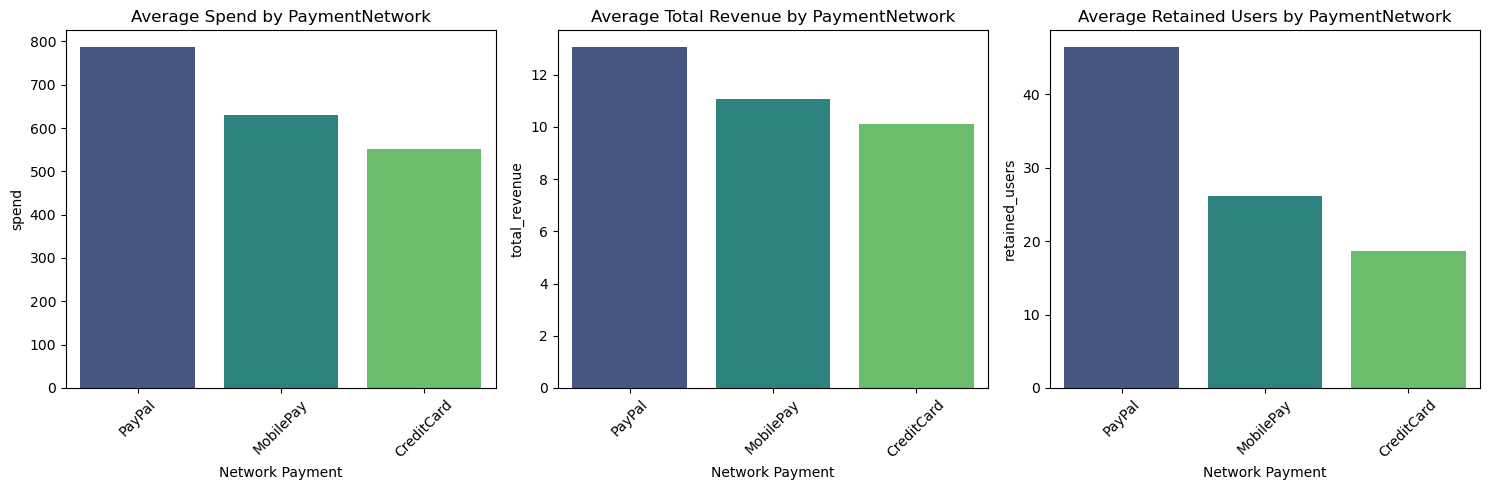

In [11]:
# Grouping data by 'network_name' and calculating the mean for selected metrics
network_grouped = data.groupby('network_payment').agg({
    'spend': 'mean',
    'total_revenue': 'mean',
    'retained_users': 'mean'
}).reset_index()

# Sorting the dataframe by total revenue for better visualization
network_grouped = network_grouped.sort_values(by='total_revenue', ascending=False)

# Plotting the metrics by network
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Metrics and titles
metrics = ['spend', 'total_revenue', 'retained_users']
plot_titles = ['Average Spend by PaymentNetwork', 'Average Total Revenue by PaymentNetwork', 'Average Retained Users by PaymentNetwork']

for ax, metric, title in zip(axes, metrics, plot_titles):
    sns.barplot(x='network_payment', y=metric, data=network_grouped, ax=ax, palette='viridis')
    ax.set_title(title)
    ax.set_ylabel(metric)
    ax.set_xlabel('Network Payment')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
    

**Observation:** "PayPal" outperforms the other ones especially when it comes to retained users. That's probably the reason why it gets a bigger spend budget.

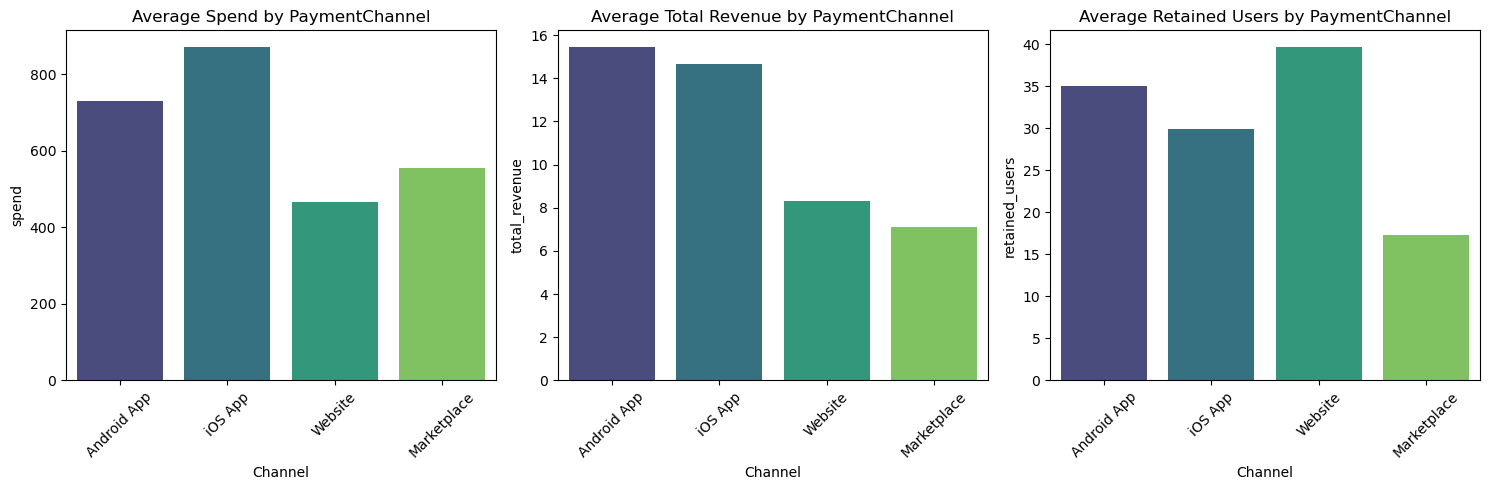

In [12]:
# Grouping data by 'channel' and calculating the mean for selected metrics
channel_grouped = data.groupby('channel').agg({
    'spend': 'mean',
    'total_revenue': 'mean',
    'retained_users': 'mean'
}).reset_index()

# Sorting the dataframe by total revenue for better visualization
channel_grouped = channel_grouped.sort_values(by='total_revenue', ascending=False)

# Plotting the metrics by sku
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, metric, title in zip(axes, metrics, plot_titles):
    sns.barplot(x='channel', y=metric, data=channel_grouped, ax=ax, palette='viridis')
    ax.set_title(title.replace("Network", "Channel"))
    ax.set_ylabel(metric)
    ax.set_xlabel('Channel')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
    

**Observation:** "Android Apps" comes at the top but its iOS counterpart is quite close - important callout is although the android app gets less spend budget. "Website" retains much better than the rest although it doesn't monetize as good as the others.

## 4) Methodology & Data Preparation

Models bee trained on the training set and validated with the test set. To be used to evaluate models using accuracy score, and fine tuned each model's parameters to maximize this metric.  Accuracy is suitable because we have a balanced dataset and measures the proportion of correctly predicted observations out of total observations. 



### 4.1) Train vs Test Set

Preparing the data to make it ready for modeling and deployment including spliting it into train set and test set with test size of 0.2 (20% test set)

In [13]:
# Imports

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Preparing the data
model_data = data.copy()

# Encoding categorical variables

model_data = pd.get_dummies(data, columns=['network_payment', 'channel', 'region'], drop_first=True)
dummy_columns = [col for col in model_data.columns if col not in data.columns]

# Selecting features for the regression model
features = ['spend', 'cohort_size', 'organic_cohort_size', 'retained_users', 
            'organic_retained_users'] + dummy_columns

X = model_data[features]
y = model_data['total_revenue']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.2) Model Training

Four models were trained, fine-tuned, and be later compared to find the best model for this task.

**- Linear regression model** 


**- DecisionTreeRegressor** 

**- RandomForestRegressor** 

**- GradientBoostingRegressor**

## 5) Model Evaluation and Results 

### 5.1) Linear Regression Model

In [14]:
# Training the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred = regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

coefficients_ = pd.DataFrame({
    'Feature': features,
    'Coefficient': regressor.coef_
}).sort_values(by='Coefficient', ascending=False)

print('Mean Squared Error: {:.2f}'.format(mse))
print('R2 Score: {:.2f}'.format(r2))
coefficients_


Mean Squared Error: 12794.72
R2 Score: 0.34


,Feature,Coefficient
13,region_NorthAm,12.639237
4,organic_retained_users,0.780518
11,region_EMEA,0.132172
3,retained_users,0.125213
6,network_payment_PayPal,0.014909
0,spend,0.005702
1,cohort_size,-0.002332
2,organic_cohort_size,-0.021453
5,network_payment_MobilePay,-0.425608
12,region_LatAM,-2.682952


**Performance Metrics:**
- **Mean Squared Error (MSE):** \(12794.72\)
  - This metric represents the average squared difference between the predicted values and the actual values. A lower MSE indicates a better fit of the model to the data. In this case, the MSE of \(12794.72\) indicates the magnitude of the error made by the model in its predictions.
  
- **\( R^2 \) Score:** \(0.3375\)
  - The \( R^2 \) score, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variables. An \( R^2 \) score of \(0.3375\) suggests that the model explains about 33.75% of the variance in the target variable. This is a low \( R^2 \) value, which means the model captures very little of the underlying structure of the data and needs improvement.

**Feature Coefficients:**

The coefficients represent the change in the dependent variable (in this case, `total_revenue`) for a one-unit change in the predictor variable, while holding all other predictors constant.

1. **Regions (NorthAM, EMEA, APAC, LatAM):** 
   - `region_NorthAM` has the highest positive coefficient of \(12.639\), suggesting that being in this region is associated with a significant increase in `total_revenue`. The other regions (`region_EMEA`, `region_APAC`, `region_LatAM`) also have positive coefficients, but with decreasing magnitude. This implies a hierarchy in terms of contribution to `total_revenue`, with `region_NorthAM` being the most influential.
  
2. **Retention Columns:**
   - `organic_retained_users` has a positive coefficient of \(0.7805\), which means for every additional user retained organically, the `total_revenue` increases by approximately \(0.78\). 
   - `retained_users` has a coefficient of \(0.1252\), indicating a smaller positive impact on `total_revenue` compared to organic retained users.
   
3. **Networks:**
   - The coefficient for `network_paymeent_PayPal` is \(0.0149\), implying a slight increase in `total_revenue` associated with this network.
   - `network_payment_MobilePay` has a negative coefficient, suggesting a decrease in `total_revenue` for this channel compared to the reference network.
<br>
   
4. **Spend:** A coefficient of \(0.0057\) indicates that for every unit increase in spend, there's a small positive effect on `total_revenue`.

5. **Cohort Sizes:** 
   - The negative coefficient for `cohort_size` (-0.0023) suggests a very slight decrease in `total_revenue` for every unit increase in the cohort size.
   - The negative coefficient for `organic_cohort_size` is larger in magnitude (-0.0215), implying a more noticeable negative effect on `total_revenue`.

6. **Channels:**
   - All channels (`iOS App`, `Website`, `Marketplace`) have negative coefficients, suggesting they negatively impact `total_revenue`. Among them, `Marketplace` has the largest negative coefficient, indicating it has the most significant negative impact on `total_revenue` compared to the reference channel.

### 5.2) Decision Tree Regressor

In [15]:
# Training the DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
y_dt_pred = dt_regressor.predict(X_test)

# Evaluating the DecisionTreeRegressor
mse_dt = mean_squared_error(y_test, y_dt_pred)
r2_dt = r2_score(y_test, y_dt_pred)

### 5.3) Random Forest Regressor

In [16]:
# Training the RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
y_rf_pred = rf_regressor.predict(X_test)

# Evaluating the RandomForestRegressor
mse_rf = mean_squared_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)

### 5.4) Gradient Boosting Regressor

In [17]:
# Training the GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(random_state=42)
gb_regressor.fit(X_train, y_train)
y_gb_pred = gb_regressor.predict(X_test)

# Evaluating the GradientBoostingRegressor
mse_gb = mean_squared_error(y_test, y_gb_pred)
r2_gb = r2_score(y_test, y_gb_pred)

### 5.5) Results

In [18]:
# Create DataFrames to store the results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'DecisionTreeRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor'],
    'Mean Squared Error': [mse, mse_dt, mse_rf, mse_gb],
    'R-squared': [r2, r2_dt, r2_rf, r2_gb]
})

# Display the results
print(results)

                       Model  Mean Squared Error  R-squared
0          Linear Regression        12794.717990   0.337548
1      DecisionTreeRegressor         6316.930107   0.672938
2      RandomForestRegressor         3728.789501   0.806940
3  GradientBoostingRegressor         2529.856339   0.869016


**Result Summary:**
- The model moderately fits the data, capturing around 33.75% of the variance in `total_revenue`.
- Regions play a significant role in predicting `total_revenue`, with `region_NorthAM` having the most substantial positive impact.
- Retention of organic users is more influential than general user retention in terms of increasing `total_revenue`.
- Among the channels, `Marketplace` has the highest negative impact on the revenue, suggesting potential areas for business improvement.
- While spend has a positive impact on `total_revenue`, the effect of cohort sizes is slightly negative, implying that other factors, such as user quality, might play a more crucial role than sheer numbers.

Thank You!